Step 1: Loading the Dataset then Checking the Sample and Target Sizes

In [12]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

#checking sample and target sizes
print("Samples (features):", breast_cancer.data.shape)
print("Targets:", breast_cancer.target.shape)
print("Target Names:", breast_cancer.target_names)

Samples (features): (569, 30)
Targets: (569,)
Target Names: ['malignant' 'benign']


Step 2: Train/Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=11)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 426
Testing set size: 143


Step 3: Training and Testing the Model (GaussianNB) then Evaluating

In [14]:
#create and train the model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

#make predictions
y_pred = nb.predict(X_test)

#estimator method score
print("GaussianNB Accuracy:", nb.score(X_test, y_test))

GaussianNB Accuracy: 0.951048951048951


Step 4: Confusion Matrix and Classification Report


Confusion Matrix:
 [[44  6]
 [ 1 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



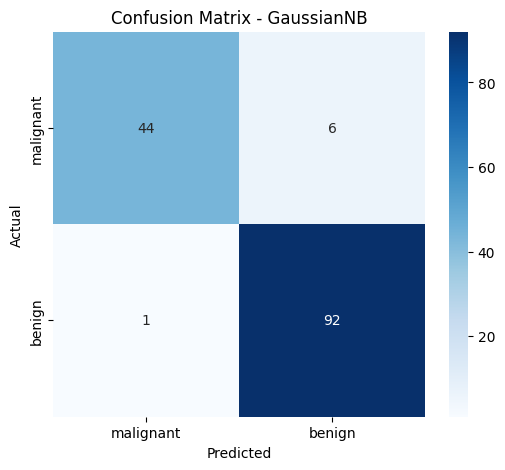

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#visualizing confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Confusion Matrix - GaussianNB")
plt.show()

Step 5: K-Fold Cross Validation

In [16]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kf)

print("Cross-Validation Scores:", scores)
print("Mean Cross Validation Accuracy:", scores.mean())

Cross-Validation Scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean Cross Validation Accuracy: 0.9384711779448622


Step 6: Multiple Model Comparison

In [18]:
#running multiple models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

estimators = {
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(
        solver='lbfgs', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

print("\n---- Multiple Model Comparison ----\n")
model_results = {}
for name, model in estimators.items():
  cv_scores = cross_val_score(estimator=model, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
  model_results[name] = cv_scores.mean()

for name, mean_accuracy in model_results.items():
  print(f"{name}: Mean Accuracy = {mean_accuracy:.4f}")


---- Multiple Model Comparison ----

GaussianNB: Mean Accuracy = 0.9385
KNN: Mean Accuracy = 0.9279
Logistic Regression: Mean Accuracy = 0.9508
SVC: Mean Accuracy = 0.9192
